# Mask RCNN

### Import libraries

In [1]:
from numpy import asarray
import numpy as np

from os import listdir
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from xml.etree import ElementTree as ET

import mrcnn.model as modellib
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.model import load_image_gt
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

from socketClass import *

import cv2
import math

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

### Load Data

In [2]:
dataset_dir = "/Users/wolfsinem/Downloads/socketdata"

#### Training

In [3]:
train_set = SocketDataset()

train_set.load_dataset(dataset_dir, is_train=True, train_max=1373)
train_set.prepare()

print('There are: {} training images'.format(len(train_set.image_ids)))

There are: 1372 training images


#### Validation

In [4]:
# val set
test_set = SocketDataset()

test_set.load_dataset(dataset_dir, is_train=False, train_max=1373)
test_set.prepare()

print("There are: {} validation images".format(len(test_set.image_ids)))

There are: 800 validation images


### Example image

In [5]:
def create_mask(bb, x):
    """Creates a mask for the bounding box of same shape as image"""
    rows,cols,*_ = x.shape
    Y = np.zeros((rows, cols))
    bb = bb.astype(np.int)
    Y[bb[0][0]:bb[0][2], bb[0][1]:bb[0][3]] = 1.
    return Y

In [6]:
image_id = 1
image = train_set.load_image(image_id)
print(image.shape)

boxes = train_set.load_mask(image_id)
Y = create_mask(boxes, image)   

(480, 480, 3)


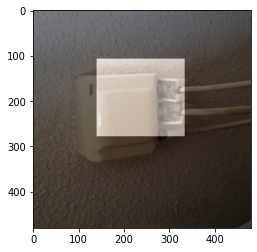

In [7]:
plt.imshow(image)
plt.imshow(Y, cmap='gray', alpha=0.5)
plt.show()

## TEST